In [1]:
from audiointerp.dataset.esc50 import ESC50dataset
from audiointerp.model.cnn14 import TransferCnn14
from audiointerp.fit import Trainer, plot_learning_curves
from audiointerp.processing.spectrogram import LogMelSTFTSpectrogram, plot_spec
import torch.nn as nn
import torch.optim as optim
import torchaudio.transforms as T_audio
import torch

In [2]:
root_dir = "/root/ESC50"
# root_dir = "/home/yuliya/ESC50"
sr = 32000
train_folds = [1, 2, 3]
valid_folds = [4]
test_folds = [5]

In [3]:
n_fft = 1024
hop_length = 320
win_length = 1024
n_mels = 64
f_min = 50
f_max = 14000
top_db = None

In [4]:
feature_extractor = LogMelSTFTSpectrogram(
    n_fft=n_fft, win_length=win_length, hop_length=hop_length,
    sample_rate=sr, n_mels=n_mels, f_min=f_min, f_max=f_max, top_db=top_db,
    return_phase=False, return_full_db=False
)

In [5]:
feature_augs = nn.Sequential(
    T_audio.FrequencyMasking(10),
    T_audio.TimeMasking(20)
)

In [6]:
train_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=train_folds, normalize="peak", feature_extractor=feature_extractor, feature_augs=feature_augs)
valid_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=valid_folds, normalize="peak", feature_extractor=feature_extractor)
test_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=test_folds, normalize="peak", feature_extractor=feature_extractor)

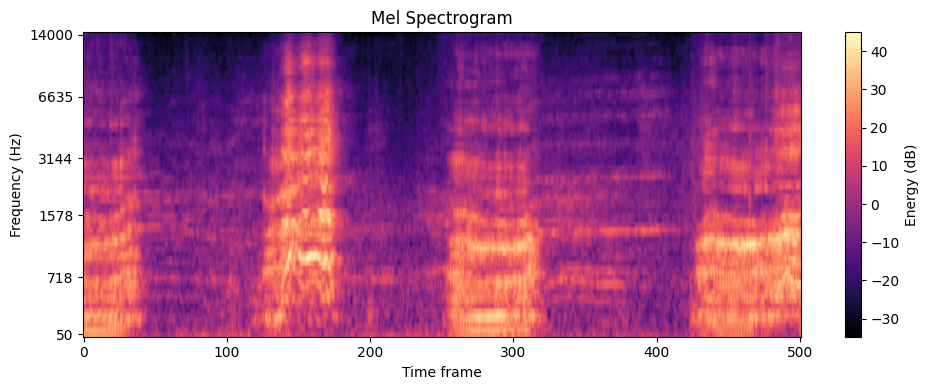

In [7]:
plot_spec(test_data[0][0], sample_rate=sr, fmin=f_min, fmax=f_max)

In [8]:
train_loader_kwargs = {"batch_size": 32, "shuffle": True}
valid_loader_kwargs = {"batch_size": 32, "shuffle": False}
test_loader_kwargs = {"batch_size": 32, "shuffle": False}

In [9]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:0")
model_cls = TransferCnn14
model_kwargs = {"num_classes": 50, "num_bins": 64}
model_pretrain_weights_path = "weights/Cnn14_mAP=0.431.pth"

optimizer_cls = optim.Adam
optimizer_kwargs = {"lr": 1e-4}

criterion_cls = nn.CrossEntropyLoss
use_mixup = True
mixup_alpha = 0.2

In [10]:
model_trainer = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs,
    use_mixup=use_mixup,
    mixup_alpha=mixup_alpha
)

Random seed set to: 42


In [11]:
train_losses, train_accs, val_losses, val_accs, test_loss, test_acc = model_trainer.train(num_epochs=20, save_weights_path="logmel_cnn14.pth")

Epoch:   5%|███▊                                                                         | 1/20 [00:17<05:33, 17.54s/it]

Train Loss: 3.8659, Train Acc: 0.0483
Valid Loss: 3.7159, Valid Acc: 0.1900


Epoch:  10%|███████▋                                                                     | 2/20 [00:34<05:11, 17.29s/it]

Train Loss: 3.5629, Train Acc: 0.1661
Valid Loss: 3.1442, Valid Acc: 0.5425


Epoch:  15%|███████████▌                                                                 | 3/20 [00:51<04:53, 17.26s/it]

Train Loss: 2.7088, Train Acc: 0.3751
Valid Loss: 1.5871, Valid Acc: 0.7600


Epoch:  20%|███████████████▍                                                             | 4/20 [01:09<04:35, 17.22s/it]

Train Loss: 1.9796, Train Acc: 0.5308
Valid Loss: 0.9512, Valid Acc: 0.8350


Epoch:  25%|███████████████████▎                                                         | 5/20 [01:26<04:20, 17.35s/it]

Train Loss: 1.5205, Train Acc: 0.6418
Valid Loss: 0.5967, Valid Acc: 0.8875


Epoch:  30%|███████████████████████                                                      | 6/20 [01:43<04:02, 17.34s/it]

Train Loss: 1.1876, Train Acc: 0.7217
Valid Loss: 0.4894, Valid Acc: 0.9125


Epoch:  35%|██████████████████████████▉                                                  | 7/20 [02:01<03:44, 17.30s/it]

Train Loss: 1.2196, Train Acc: 0.7628
Valid Loss: 0.4416, Valid Acc: 0.9150


Epoch:  40%|██████████████████████████████▊                                              | 8/20 [02:18<03:27, 17.29s/it]

Train Loss: 1.1808, Train Acc: 0.7658
Valid Loss: 0.4389, Valid Acc: 0.9150


Epoch:  45%|██████████████████████████████████▋                                          | 9/20 [02:35<03:09, 17.23s/it]

Train Loss: 0.8861, Train Acc: 0.8360
Valid Loss: 0.3671, Valid Acc: 0.9225


Epoch:  50%|██████████████████████████████████████                                      | 10/20 [02:52<02:52, 17.25s/it]

Train Loss: 1.0838, Train Acc: 0.8068
Valid Loss: 0.3706, Valid Acc: 0.9125


Epoch:  55%|█████████████████████████████████████████▊                                  | 11/20 [03:09<02:34, 17.22s/it]

Train Loss: 1.0899, Train Acc: 0.7983
Valid Loss: 0.3806, Valid Acc: 0.9200


Epoch:  60%|█████████████████████████████████████████████▌                              | 12/20 [03:27<02:17, 17.23s/it]

Train Loss: 0.8651, Train Acc: 0.8328
Valid Loss: 0.3318, Valid Acc: 0.9175


Epoch:  65%|█████████████████████████████████████████████████▍                          | 13/20 [03:44<02:00, 17.24s/it]

Train Loss: 0.8155, Train Acc: 0.8542
Valid Loss: 0.3038, Valid Acc: 0.9250


Epoch:  70%|█████████████████████████████████████████████████████▏                      | 14/20 [04:01<01:43, 17.25s/it]

Train Loss: 0.8990, Train Acc: 0.8483
Valid Loss: 0.3288, Valid Acc: 0.9275


Epoch:  75%|█████████████████████████████████████████████████████████                   | 15/20 [04:18<01:26, 17.25s/it]

Train Loss: 0.8897, Train Acc: 0.8352
Valid Loss: 0.3068, Valid Acc: 0.9275


Epoch:  80%|████████████████████████████████████████████████████████████▊               | 16/20 [04:36<01:08, 17.24s/it]

Train Loss: 0.8379, Train Acc: 0.8579
Valid Loss: 0.3128, Valid Acc: 0.9250


Epoch:  85%|████████████████████████████████████████████████████████████████▌           | 17/20 [04:53<00:51, 17.25s/it]

Train Loss: 0.9280, Train Acc: 0.8445
Valid Loss: 0.2901, Valid Acc: 0.9225


Epoch:  90%|████████████████████████████████████████████████████████████████████▍       | 18/20 [05:10<00:34, 17.27s/it]

Train Loss: 0.8328, Train Acc: 0.8497
Valid Loss: 0.2872, Valid Acc: 0.9225


Epoch:  95%|████████████████████████████████████████████████████████████████████████▏   | 19/20 [05:28<00:17, 17.30s/it]

Train Loss: 1.1358, Train Acc: 0.7995
Valid Loss: 0.3289, Valid Acc: 0.9200


Epoch: 100%|████████████████████████████████████████████████████████████████████████████| 20/20 [05:45<00:00, 17.27s/it]


Train Loss: 0.8435, Train Acc: 0.8586
Valid Loss: 0.3046, Valid Acc: 0.9175
Best val Acc: 0.9275
Модель сохранена в logmel_cnn14.pth
Test Loss: 0.3468, Test Acc: 0.9250


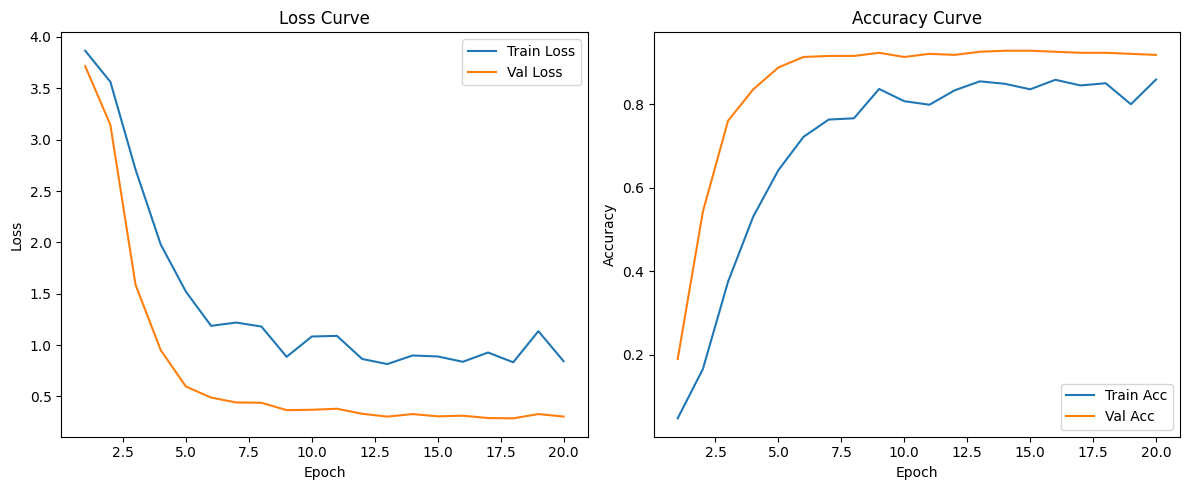

In [12]:
plot_learning_curves(train_losses=train_losses, train_accs=train_accs, val_losses=val_losses, val_accs=val_accs)

In [13]:
model_trainer.model.load_state_dict(torch.load("logmel_cnn14.pth"))

<All keys matched successfully>

In [14]:
model_trainer.test()

Test Loss: 0.3468, Test Acc: 0.9250


(0.3467729318141937, 0.925)